In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
data_qr = pd.read_excel("MainstreamQR and QRRDP Time Series by UOA_v1.0.xlsx", sheet_name="Total", header=8).iloc[:-1]


In [26]:
data_qr

,Unit of assessment (REF2021),Unnamed: 1,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,2025-26
0,1.0,Clinical Medicine,122580619,124775660,126269897,124387554,127921591,127780383,126579002,146435496,147875384,148371115,149292934
1,2.0,"Public Health, Health Services and Primary Care",44318436,44987847,45833642,44566996,46116969,45766899,46181366,65940919,66958368,67087020,67934502
2,3.0,"Allied Health Professions, Dentistry, Nursing ...",77012890,78386792,78913541,78225149,79864331,79775224,79503318,103617054,104995510,105329902,107743005
3,4.0,"Psychology, Psychiatry and Neuroscience",63943709,65394097,78032146,76175588,87750096,87206323,89098898,108296825,109765722,110203651,120318238
4,5.0,Biological Sciences,80369651,82273799,83694977,83119498,85780948,87195826,87080244,91731905,90792968,91178588,89906088
5,6.0,"Agriculture, Food and Veterinary Sciences",20865206,21077497,21542837,21047677,21563665,21969221,22077746,25738714,25665695,25745151,25586862
6,7.0,Earth Systems and Environmental Sciences,37801456,38678199,39116957,38567457,39736632,39731023,39639227,47225595,46812583,46940387,46348991
7,8.0,Chemistry,49073417,49824979,50263821,49781216,50855433,50834055,50846379,57335213,57270811,57576228,56021345
8,9.0,Physics,59955952,60967171,62369927,61555091,63636707,64245607,63792911,74213441,73717960,74011058,72958325
9,10.0,Mathematical Sciences,63476827,64835954,65678592,64253466,66284626,66442920,66418521,75203311,75179878,75367166,73884539


In [27]:
sns.set_theme()
# Create an array with the colors you want to use
colors = ["#2E2D62", "#FF6900", "#00A788", "#1E5DF8", "#E355EC", "#3E863E", "#BE2BBB", "#008AAD", "#005E54", "#C13D33"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

sns.color_palette()

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

style_dict = {'axes.facecolor': 'white',
              'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': False,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False}

sns.set_style("whitegrid", style_dict)

In [28]:
data_qr.columns

Index(['Unit of assessment (REF2021)', 'Unnamed: 1', '2015-16', '2016-17',
       '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23',
       '2023-24', '2024-25', '2025-26'],
      dtype='object')

In [29]:
data_qr.rename(columns={"Unnamed: 1": "UoA"}, inplace=True)

In [30]:
data_select = data_qr.sort_values(by="2025-26", ascending=False).head(10)


<Axes: xlabel='variable', ylabel='value'>

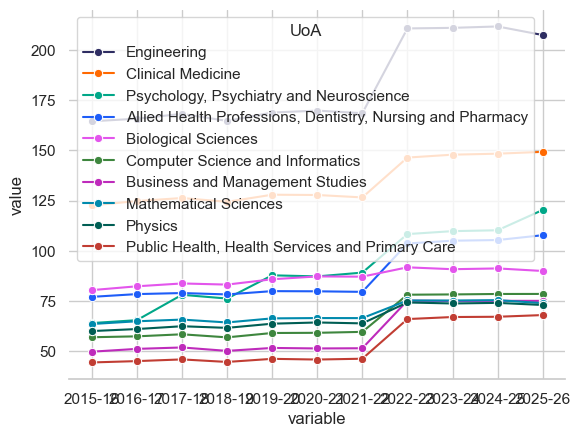

In [31]:
data_melt = data_select.drop(columns="Unit of assessment (REF2021)").melt(id_vars="UoA")
data_melt['value'] = data_melt['value'] / 1000000

sns.lineplot(data=data_melt, x="variable", y="value", hue="UoA", marker="o")


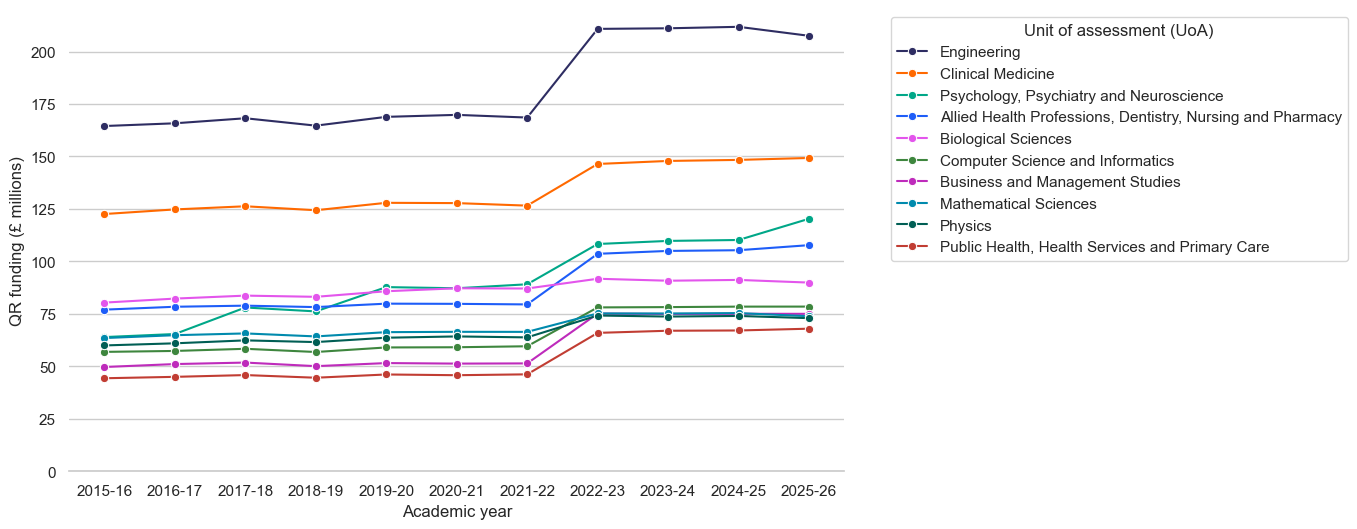

In [32]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=data_melt, x="variable", y="value", hue="UoA", marker="o")
plt.ylabel("QR funding (£ millions)")
plt.xlabel("Academic year")

plt.ylim(bottom=0)

plt.legend(title="Unit of assessment (UoA)", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().grid(axis='x')

In [33]:
data_qr_out = data_qr.rename(columns={'Unit of assessment (REF2021)':'UoA_code'}).drop(columns=['2015-16', '2016-17', '2017-18', '2024-25', '2025-26'])

In [34]:
data_hesa = pd.read_csv('Income_by_UoA.csv')


In [35]:
data_qr_out.columns = data_qr_out.columns.str.replace('-', '/')


In [36]:
data_melt = data_hesa.melt(id_vars=['UoA', 'UoA_code', 'Source of income group'])

data_melt['value'] = data_melt['value']/1000

data_pivot_hesa = data_melt.pivot(index=['UoA', 'UoA_code', 'Source of income group'], columns='variable', values='value').reset_index()

In [37]:
data_qr_out['Source of income group'] = 'QR allocation'

data_melt = data_qr_out.melt(id_vars=['UoA', 'UoA_code', 'Source of income group'])

data_melt['value'] = data_melt['value']/1000000

data_qr_to_concat = data_melt.pivot(index=['UoA', 'UoA_code', 'Source of income group'], columns='variable', values='value').reset_index()

In [38]:
data_concat = pd.concat([data_pivot_hesa, data_qr_to_concat])


In [39]:
data_concat[['UoA', 'UoA_code']].drop_duplicates().sort_values(by='UoA_code')

variable,UoA,UoA_code
22,Clinical Medicine,1.0
58,"Public Health, Health Services and Primary Care",2.0
2,"Allied Health Professions, Dentistry, Nursing ...",3.0
56,"Psychology, Psychiatry and Neuroscience",4.0
14,Biological Sciences,5.0
0,"Agriculture, Veterinary and Food Science",6.0
0,"Agriculture, Food and Veterinary Sciences",6.0
28,Earth Systems and Environmental Sciences,7.0
18,Chemistry,8.0
52,Physics,9.0


In [40]:
dict_uoa = {
    "Agriculture, Food and Veterinary Sciences":"Agriculture, Veterinary and Food Science",
    "Geography and Environmental Studies":"Geography, Environmental Studies "
}

data_concat['UoA'] = data_concat['UoA'].apply(lambda x: dict_uoa.get(x, x))

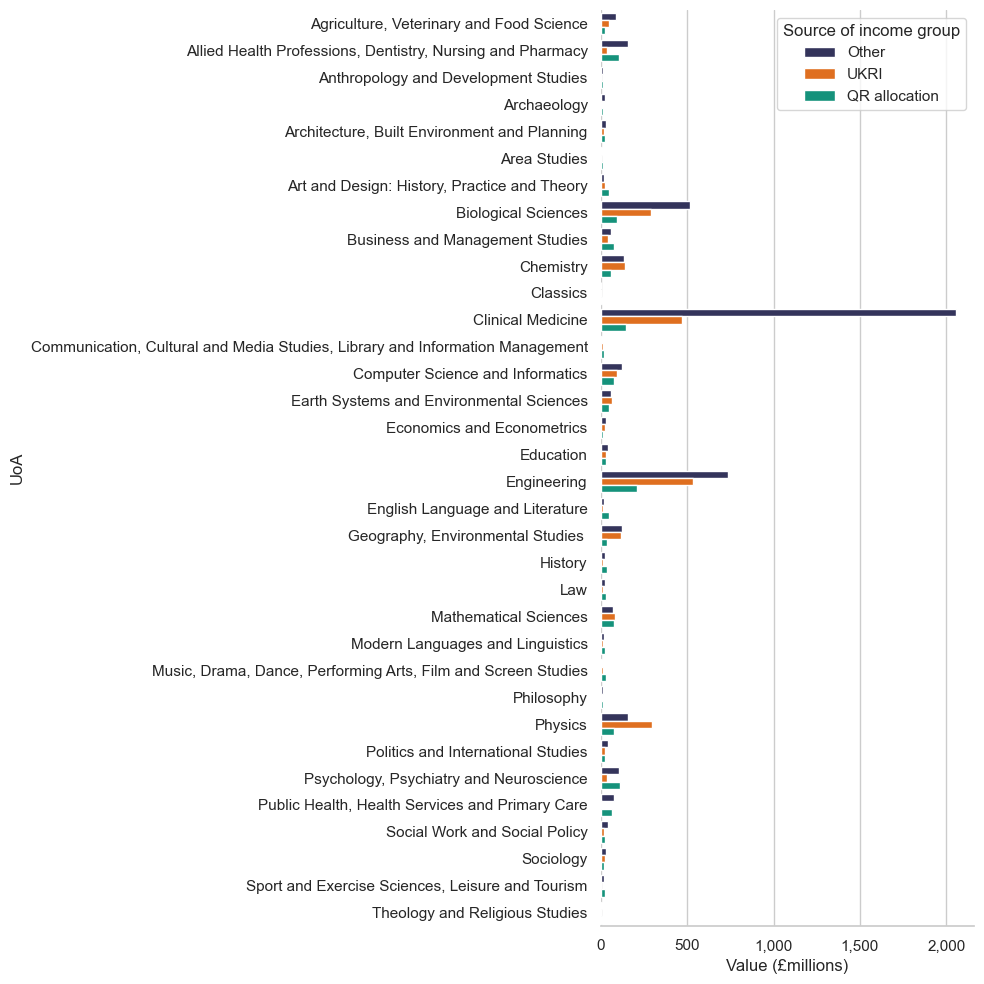

In [41]:
plt.figure(figsize=(10,10))

sns.barplot(data=data_concat, x='2023/24', y='UoA', hue='Source of income group')

plt.xlabel("Value (£millions)")

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

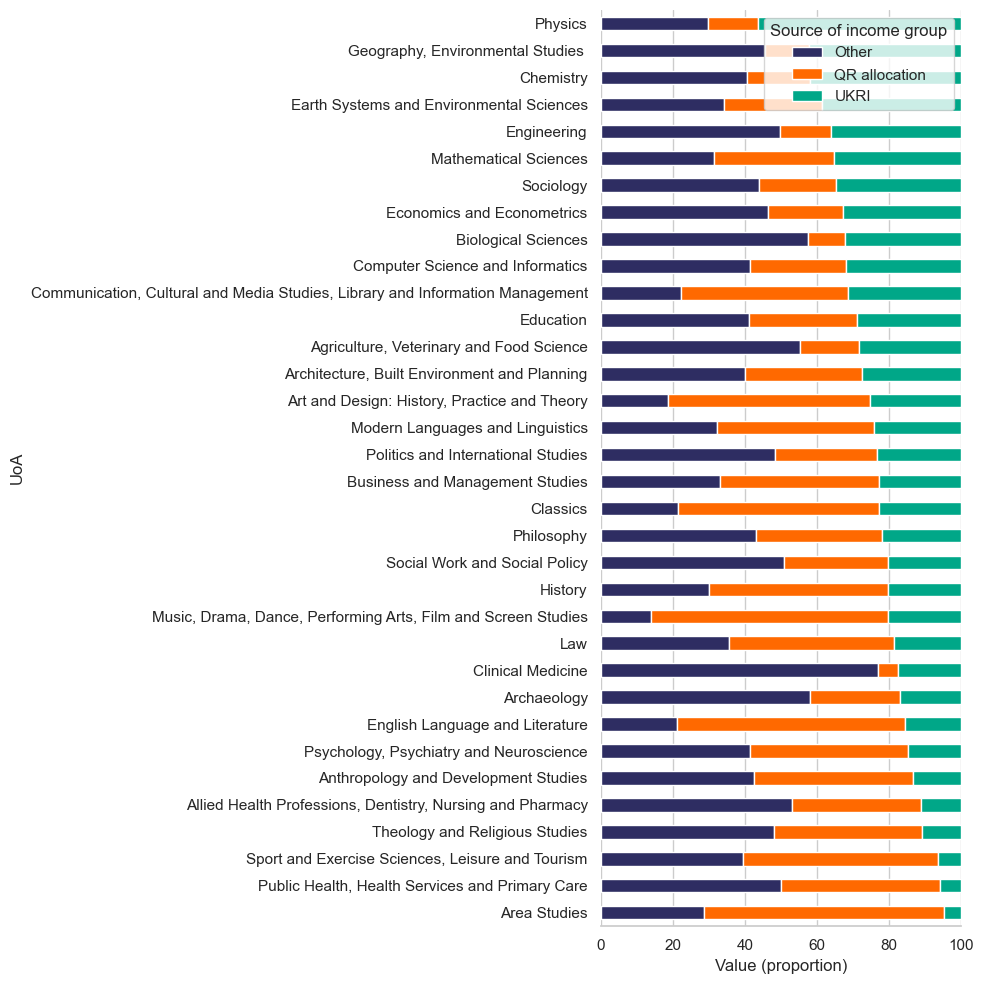

In [61]:
data_pivot = data_concat.pivot(index='UoA', columns='Source of income group', values='2023/24')

data_percentage = data_concat.copy()

data_percentage[data_percentage.columns[3:]] = data_percentage.groupby(['UoA', 'UoA_code'])[data_percentage.columns[3:]].transform(lambda x: x / x.sum() * 100)

data_pivot = data_percentage.pivot(index='UoA', columns='Source of income group', values='2023/24')

plt.figure(figsize=(10,10))

data_pivot.sort_values(by='UKRI').plot.barh(stacked=True, ax=plt.gca())

plt.xlabel("Value (proportion)")

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlim((0,100))
plt.gca().grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:
data_concat.to_csv("HESA_and_QR_data.csv", index=False)

In [ ]:
qr_institution = pd.read_excel("RE-290725-GrantAllocationsData2025To2026.xlsx", sheet_name="Table1_QR_HEIF", header=1)

In [ ]:
qr_institution.columns

In [ ]:
qr_sort = qr_institution.sort_values(by='Total  QR and HEIF grant 2025 to 2026', ascending=False).dropna(subset='UKPRN')
qr_sort['Total  QR and HEIF grant 2025 to 2026'] = qr_sort['Total  QR and HEIF grant 2025 to 2026']/1e6

In [ ]:
plt.figure(figsize=(20,10))

sns.barplot(data=qr_sort, x='Higher education provider', y='Total  QR and HEIF grant 2025 to 2026')

plt.ylabel("Total QR and HEIF grant allocation (£millions)")
plt.xticks([])

plt.tight_layout()
plt.show()
